# QM 2

## Extra Workshop Week 10 

## Introduction

In this workshop you will learn how to install and run TensorFlow on your machine and we will train a simple classifier to classify different images that we have collected together as a group.   After this workshop you can take this example code as well as this classifier and build your own image classifier by replacing the images you feed into this Neural Network.

### What is TensorFlow?

TensorFlow is a an open source library for computation, which is specialised for running large machine learning applications.  Since TensorFlow is a general purpose language underneath the hood, these models, or Tensor Models can be run on a variety of platforms including Desktop, Mobile Phones or large servers.

### What is a Tensor?
Simply, a Tensor is just a multi-dimensional matrix that can store different multivariate vectors that can be applied against different functions.  Think back to your maths days and linear algebra, where you can apply a function to a matrix and get a result to do something.  For example, if you store an image as a matrix of all pixels where each pixel is an array of 3 values [RGB colour values] and by applying a linear algebra function to part of that matrix you can select a small region which as a result will transpose the matrix into a different matrix.  To the user however this will look like that region in the image will be rotated. 

Therefore, TensorFlow is just a way to apply these functions in a graph or workflow to do complex functions within high-level code.

### What were going to do today?

We are going to use the Inception v3 network. Inception v3 is a trained for the [ImageNet](http://image-net.org/) Large Visual Recognition Challenge using the data from 2012, and it can differentiate between 1,000 different classes, like Dalmatian or dishwasher. We will use this same network, but retrain it to tell apart a small number of classes based on our own images and then retrain part the final part of this model.


## Download Data

Lets fetch the data we will be using for this session. You can either upload the data to the Azure notebook by using the Data Menu above or you can use the following cell to fetch the data directly from the QM2 server.

Let's create a folder that we can store all our data for this session

In [1]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [2]:
!mkdir ./data/xwk10
!curl https://s3.eu-west-2.amazonaws.com/qm2/x10/retrained_labels.txt -o ./data/xwk10/retrained_labels.txt
!curl https://s3.eu-west-2.amazonaws.com/qm2/x10/retrained_graph.pb -o ./data/xwk10/retrained_graph.pb
!curl https://s3.eu-west-2.amazonaws.com/qm2/x10/cat.jpg -o ./data/xwk10/cat.jpg

mkdir: cannot create directory ‘./data/xwk10’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   118  100   118    0     0    110      0  0:00:01  0:00:01 --:--:--   110
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 83.4M  100 83.4M    0     0  1196k      0  0:01:11  0:01:11 --:--:-- 1345k0:05  0:00:55 1487k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41588  100 41588    0     0  65389      0 --:--:-- --:--:-- --:--:-- 65492


## Installing TensorFlow

### Within the Lab

TensorFlow has 2 main flavours that we can use, a CPU and a GPU version. GPU's to use specialised hardware to speed up computations and parallelise some jobs over multiple hardware.

To install TensorFlow (CPU version) into your Anaconda Environment then follow these steps:

1.  Start a new environment named `tensorflow` and invoke Python 

`conda create -n tensorflow`

2.  Activate the conda environment

`source activate tensorflow`
`(tensorflow)$  # Your prompt should change `

3.  Type the following to install TensorFlow into your environment (Python 2.7) :

** Windows **

    pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/windows/cpu/tensorflow-1.0.1-cp35-cp35m-win_amd64.whl

** Mac **

    pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.0.1-py2-none-any.whl

** Linux **

    pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.0.1-cp27-none-linux_x86_64.whl
    
If you are having any trouble installing TensorFlow then follow the instructions here:

https://www.tensorflow.org/install/

## Check that TensorFlow is Working

Run the following code to check that TensorFlow is running.  If you don't get any errors then it's working.

In [3]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))
print(tf.__version__)

Hello, TensorFlow!
1.3.0


## Training the Model

We now need to train the model with the data we've collected as a class

We will do this together within the workshop and when the graph file is ready you will get a download link to get the model file. 

Just so you can see what happens within the CNN process, I have included some of the training summary data.  The CNN is setup within the code and then some images are passed through the flow to server as training data.  Once the model has been trained, another batch of images are used to validate the model.  At the end of training/validation we will get a few different graphs showing the accuracy, cross entropy as well summaries of the weights used as bias through the different layers of the CNN.  We will explain these graphs through the workshop.

To give you an idea of how long it takes to build this model, I've included the times it took me to build the model from our images:

**Example training times for our class dataset**

- CPU: **6 hours**
- 1x GPU: **30 minutes**
- 4x GPU: **5 minutes**

** Accuracy **
![alt text](https://media.stevenjamesgray.com/ml/wk10/accuracy.png "Accuracy")

** Cross Entropy **
![alt text](https://media.stevenjamesgray.com/ml/wk10/cv.png "Cross Validation")

** Bias Distribution - Training Stage **
![alt text](https://media.stevenjamesgray.com/ml/wk10/bias_train.png "Bias Traininng")

** Bias Distribution - Validation Stage **
![alt text](https://media.stevenjamesgray.com/ml/wk10/bias_validation.png "Bias Validation")

## Using The Model


The code below allows us to use our model with different images and then classify that image against our trained dataset.  The code will fetch an image within a data folder and then give us weightings that, hopefully, represent what the image is. 

### List our labels

In [4]:
with open('./data/xwk10/retrained_labels.txt', 'r') as labelsFile:
    data=labelsFile.read().replace('\n', '\r\n')
    print
    print ("Trained Labels")
    print ("***********************")
    print data


Trained Labels
***********************
castles
horse
dogs
vases
dandelion
tulips
daisy
macron
foxes
houses
roses
cats
sunflowers
trains
footprint
mice
memes



Can you extend the code to fetch any image from the web and then pass it through our model?

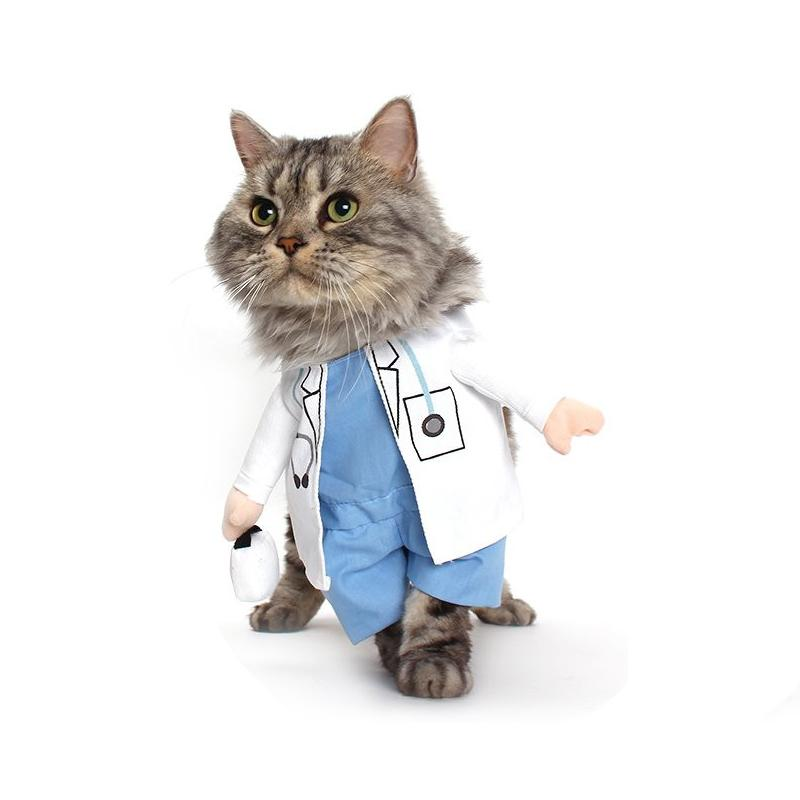

In [5]:
import requests

#def download_file_using_requests(url, disk_location):
    #r = requests.get(url, stream=True)
    #if r.status_code == 200:
        #with open(disk_location, 'wb') as f:
            #for chunk in r.iter_content(1024):
                #f.write(chunk)

#image_url = "https://www.woodlandtrust.org.uk/media/100819084/fox-laurie-campbell.jpg"                
                
#download_file_using_requests(image_url, './data/xwk10/00000001.jpg')

#image_path = "./data/xwk10/00000001.jpg"
image_path = "./data/xwk10/cat.jpg"
from IPython.display import Image
Image(filename=image_path) 

## Classifying an Image

Loading: ./data/xwk10/cat.jpg

Results
*******************************
cats (score = 0.99887) <------ WINNER
roses (score = 0.00030)
daisy (score = 0.00023)
tulips (score = 0.00014)
dandelion (score = 0.00008)
memes (score = 0.00008)
houses (score = 0.00007)
sunflowers (score = 0.00006)
dogs (score = 0.00004)
macron (score = 0.00003)
vases (score = 0.00002)
castles (score = 0.00002)
horse (score = 0.00002)
trains (score = 0.00001)
foxes (score = 0.00001)
mice (score = 0.00001)
footprint (score = 0.00001)
*******************************


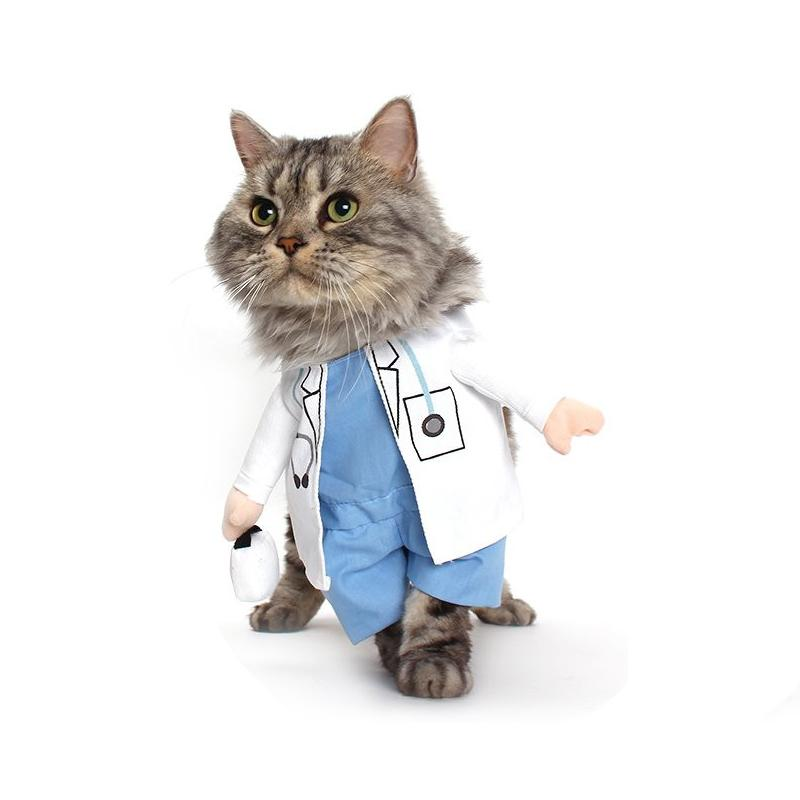

In [6]:
import tensorflow as tf, sys

# Stop the Verbose Messages
tf.logging.set_verbosity(tf.logging.ERROR)

image_path = "./data/xwk10/cat.jpg"

# Read in the image_data
image_data = tf.gfile.FastGFile(image_path, 'rb').read()

print ("Loading: "  + image_path)

# Loads label file, strips off carriage return
label_lines = [line.rstrip() for line
                   in tf.gfile.GFile("./data/xwk10/retrained_labels.txt")]

# Unpersists graph from file
with tf.gfile.FastGFile("./data/xwk10/retrained_graph.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

with tf.Session() as sess:
    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

    predictions = sess.run(softmax_tensor, \
             {'DecodeJpeg/contents:0': image_data})

    # Sort to show labels of first prediction in order of confidence
    top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]

    count = 0 ;
    print
    print ("Results")
    print ("*******************************")
    for node_id in top_k:
        count = count+1
        human_string = label_lines[node_id]
        score = predictions[0][node_id]
        if(count == 1):
            print ('%s (score = %.5f) <------ WINNER' %  (human_string, score))
        else:
            print ('%s (score = %.5f)' % (human_string, score))
    
    print "*******************************"
    
from IPython.display import Image
Image(filename=image_path) 
    


###  What does the TensorFlow graph look like? 

TensorFlow builds a graph of Tensors that pass the inputs through various steps.  The code below will fetch our graph and allow you to explore what the compiled graph looks like.

In [7]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
import numpy

## Setting up the embeded browser

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(numpy.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
show_graph(tf.get_default_graph().as_graph_def())


##  Learning more about TensorFlow

If you want to learn more about TensorFlow and what you can do with the platform then you can find more guides here:

https://www.tensorflow.org/get_started/get_started